Author: Daniel Abadjiev   
Date: December 5, 2025  
Description: Notebook to test out what is going on with tracklists p, and pt

In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
import sys
sys.path.append("/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/")
from plotUtils import *
import pickle

In [4]:
trackDirBib_mm = '/local/d1/smartpixML/reGenBIB/produceSmartPixMuC/Tracklists0730_mm/BIB_tracklists/'
trackDirSig = '/local/d1/smartpixML/bigData/tracklists/signal_tracklists'


In [6]:
tracksBib_mm = loadTrackData(trackDirBib_mm)
tracksSig = loadTrackData(trackDirSig)
truthDF = pd.read_pickle("dfOfTruth.pkl")
truthBib_mm = truthDF.query("source == 'bib_mm'")
truthSig = truthDF.query("source == 'sig'")

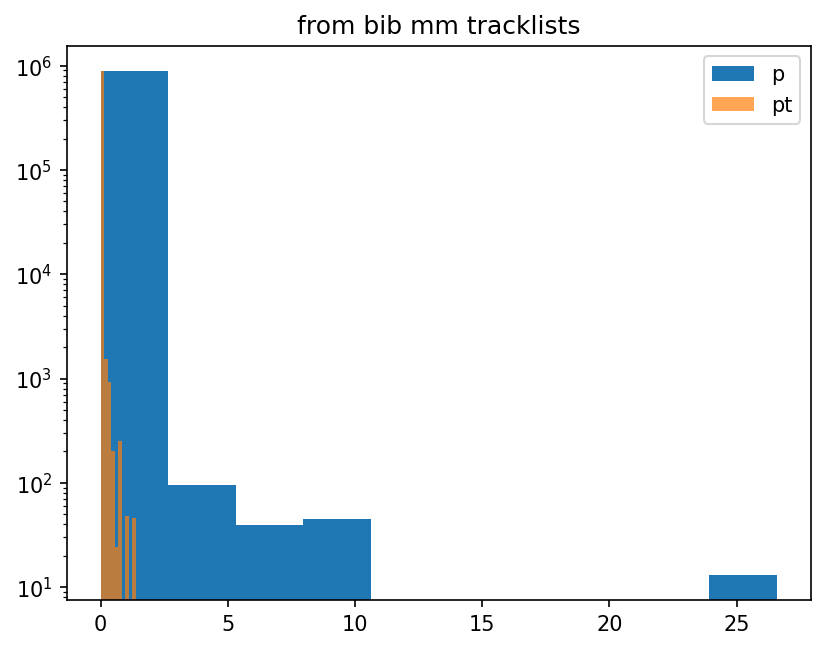

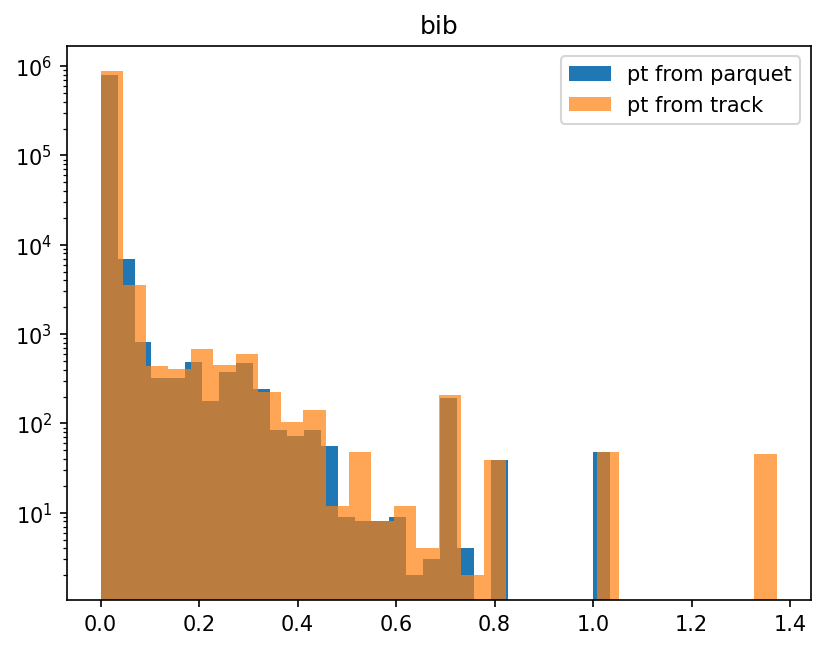

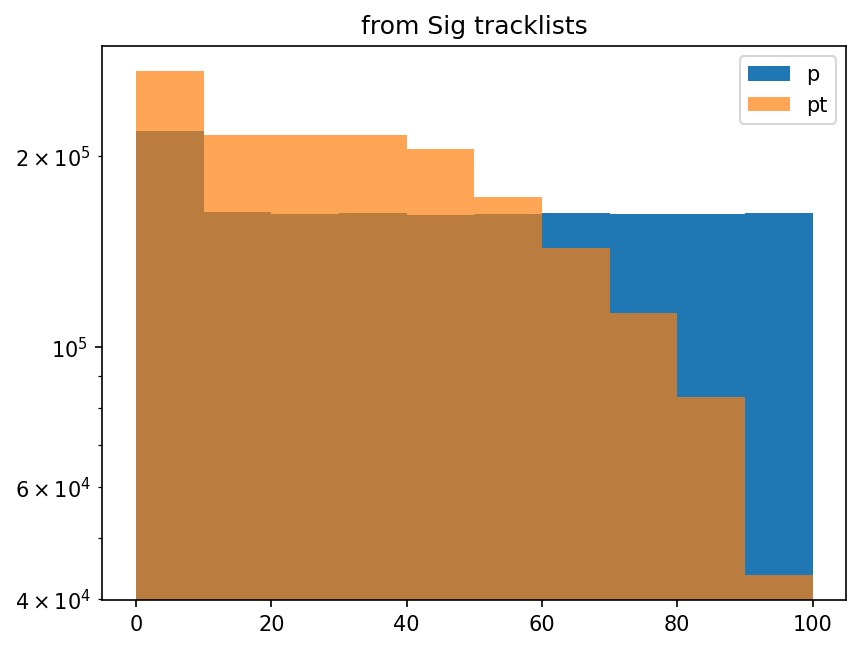

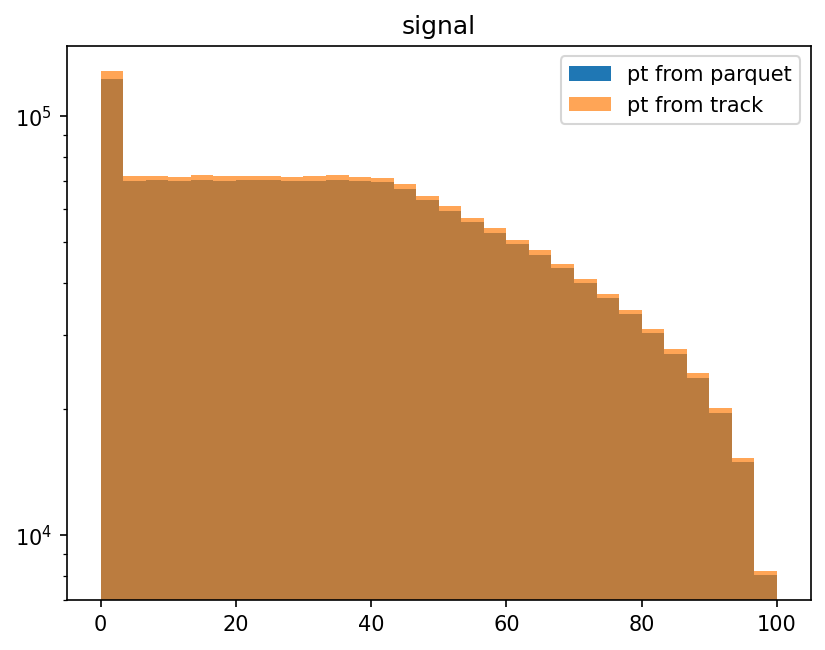

In [14]:

# tracks1 = 
plt.hist(tracksBib_mm["p"],label="p")
plt.hist(tracksBib_mm["pt"], label="pt",alpha=0.7)
plt.title("from bib mm tracklists")
plt.legend()
plt.yscale('log')
plt.show()
plt.hist(truthBib_mm["pt"],bins=30,label="pt from parquet")
plt.hist(tracksBib_mm["pt"],bins=30,label="pt from track",alpha=0.7)
plt.title("bib")
plt.legend()
plt.yscale('log')

plt.show()

# tracks1 = 
plt.hist(tracksSig["p"],label="p")
plt.hist(tracksSig["pt"], label="pt",alpha=0.7)
plt.title("from Sig tracklists")
plt.legend()
plt.yscale('log')
plt.show()
plt.hist(truthSig["pt"],bins=30,label="pt from parquet")
plt.hist(tracksSig["pt"],bins=30,label="pt from track",alpha=0.7)
plt.title("signal")
plt.legend()
plt.yscale('log')

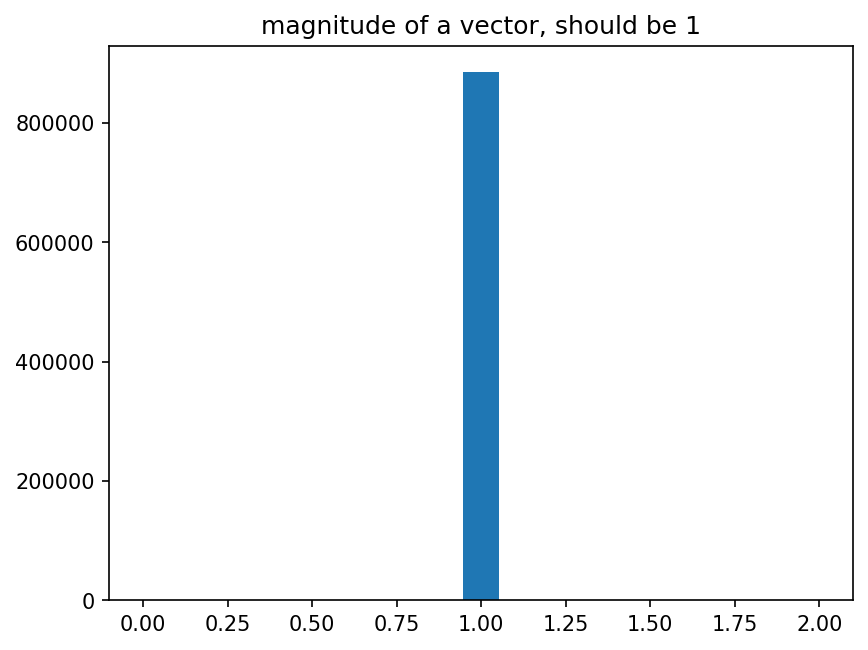

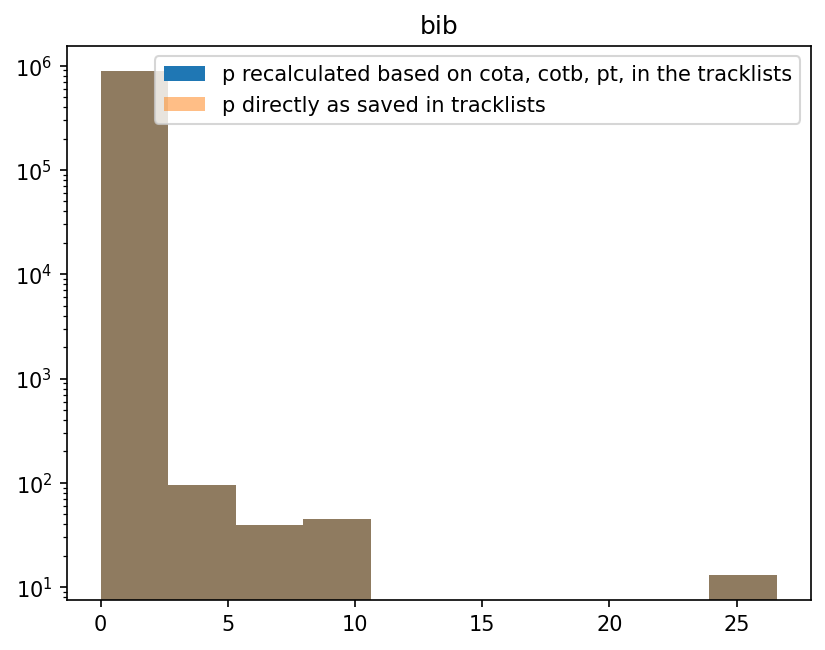

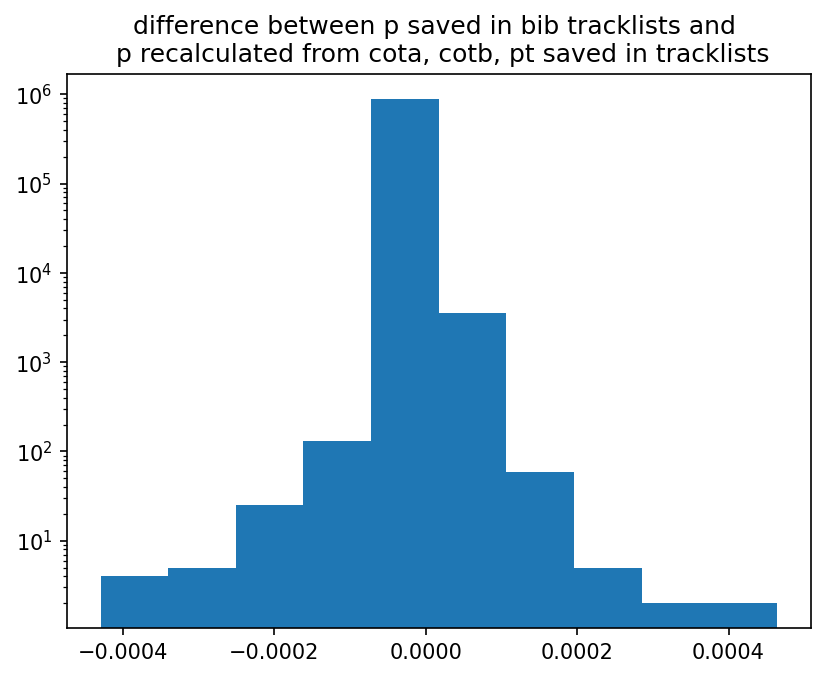

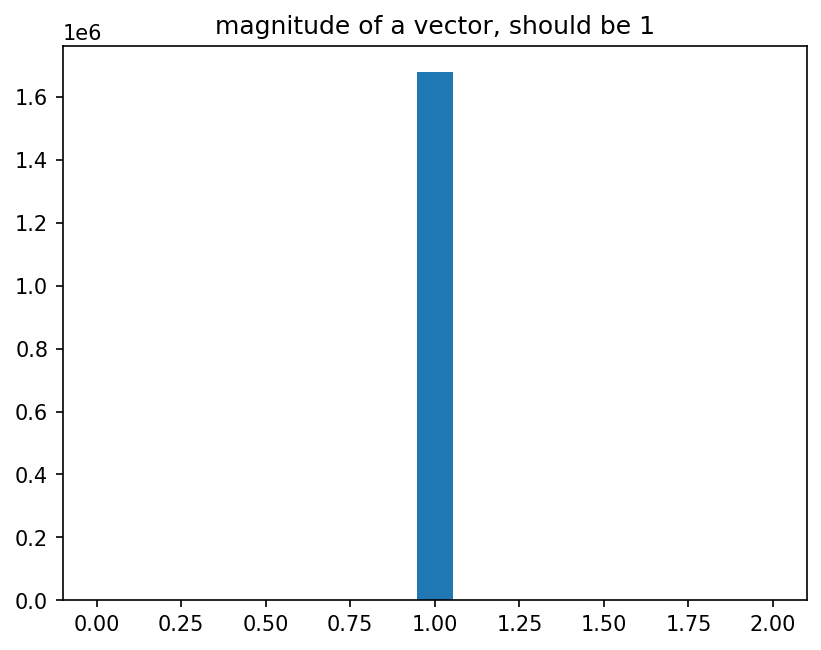

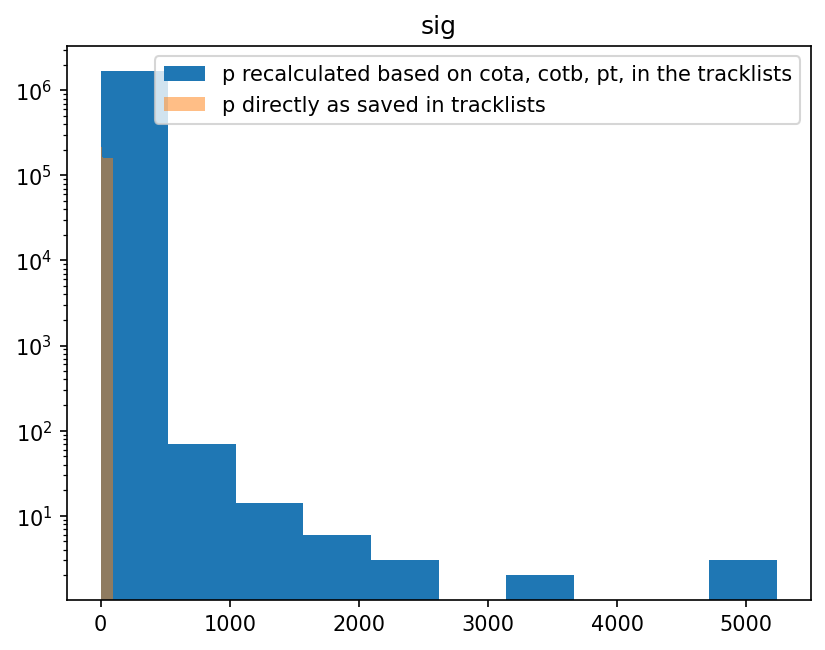

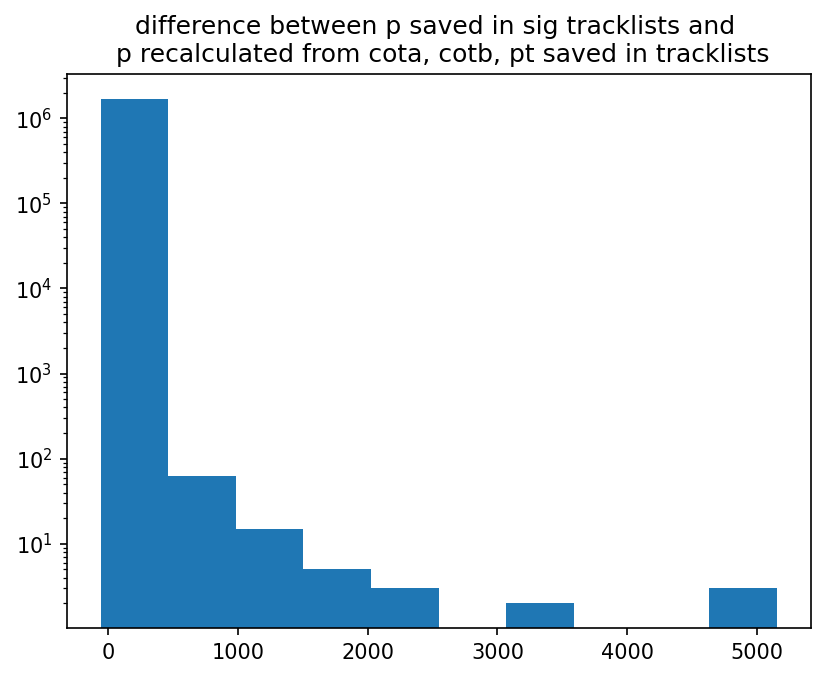

In [ ]:
def plotPCalcTrackComparison(tracksDF,bibSigLabel="bib"):
    z = 1./np.sqrt((1.+tracksDF["cotb"]*tracksDF["cotb"]+tracksDF["cota"]*tracksDF["cota"]))
    x = z*tracksDF["cota"]
    y = z*tracksDF["cotb"]
    qq = x**2 +y**2 +z**2 

    plt.hist(qq,bins=np.linspace(0,2,20))
    plt.title("magnitude of a vector, should be 1")
    plt.show()

    p = tracksDF["pt"] / np.sqrt((z**2 +y**2)/(x**2 +y**2 +z**2 ))
    plt.hist(p,label="p recalculated based on cota, cotb, pt, in the tracklists")
    plt.hist(tracksDF["p"],label="p directly as saved in tracklists",alpha = 0.5)
    plt.yscale('log')
    plt.title(f"{bibSigLabel}")
    plt.legend()
    plt.show()
    plt.hist(p - tracksDF["p"])
    plt.title(f"difference between p saved in {bibSigLabel} tracklists and \n p recalculated from cota, cotb, pt saved in tracklists")
    plt.yscale('log')
    plt.show()

plotPCalcTrackComparison(tracksBib_mm)
plotPCalcTrackComparison(tracksSig,bibSigLabel="sig")


(array([218311., 162878., 161993., 162168., 161496., 162094., 162252.,
        161701., 161993., 162352.]),
 array([1.4200000e-03, 1.0001273e+01, 2.0001126e+01, 3.0000979e+01,
        4.0000832e+01, 5.0000685e+01, 6.0000538e+01, 7.0000391e+01,
        8.0000244e+01, 9.0000097e+01, 9.9999950e+01]),
 <BarContainer object of 10 artists>)

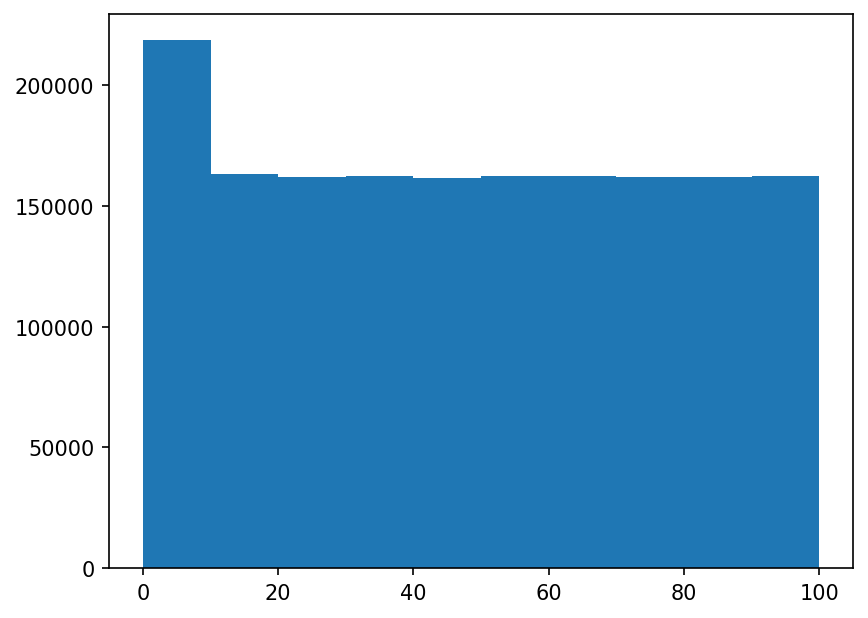

In [13]:
plt.hist(tracksSig["p"])